# ETL

### Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext

In [2]:
import pyspark.sql.functions as F

In [20]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [6]:
df = spark.read.csv('../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [7]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551247|    P|11881432|2017-03-30|
|168549788|    P|  295469|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548101|    P| 6913185|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168551086|    P|23491655|2017-03-30|
|168550576|    P|  324249|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168533577|    P| 1074029|2017-03-30|
|168550945|    P|23250909|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550907|    P| 6477086|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [38]:
# create new or overwrite original field with withColumn
df = df.withColumn('date',F.col('date').cast('date'))
df

DataFrame[uid: string, event: string, song_id: string, date: date]

In [39]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551247|    P|11881432|2017-03-30|
|168549788|    P|  295469|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548101|    P| 6913185|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168548942|    P| 4112522|2017-03-30|
|168551086|    P|23491655|2017-03-30|
|168550576|    P|  324249|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550352|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168543026|    P| 6623026|2017-03-30|
|168533577|    P| 1074029|2017-03-30|
|168550945|    P|23250909|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550571|    P|       0|2017-03-30|
|168550907|    P| 6477086|2017-03-30|
|168550571|    P|       0|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



# Some exploration

In [40]:
# simple count rows
df.count()

12136101

In [41]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59300

In [42]:
df.filter(F.col('event')=='P').count()

10764815

In [43]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  610863|
|    S|  760423|
|    P|10764815|
+-----+--------+



In [44]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  610863|99517142|
|    S|  760423|99517142|
|    P|10764815|99980028|
+-----+--------+--------+



In [45]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 30962|
|2017-04-01|    P|471124|
|2017-04-01|    S| 33433|
|2017-04-02|    D| 27396|
|2017-04-02|    P|439000|
|2017-04-02|    S| 30811|
|2017-04-03|    D| 18905|
|2017-04-03|    P|244744|
|2017-04-03|    S| 26945|
|2017-04-04|    D| 19334|
|2017-04-04|    P|372766|
|2017-04-04|    S| 24373|
|2017-04-05|    D| 14205|
|2017-04-05|    P|306700|
|2017-04-05|    S| 18372|
+----------+-----+------+



In [48]:
date_count = df.groupBy('date').count().toPandas()

In [107]:
#date_count


(array([736410., 736420., 736430., 736440., 736450., 736460., 736470.]),
 <a list of 7 Text xticklabel objects>)

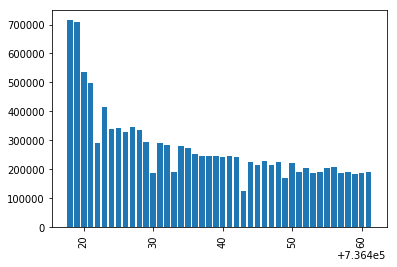

In [51]:
from matplotlib.dates import date2num
plt.bar(date2num(date_count['date']),date_count['count'])
#plt.bar(date_count['date'],date_count['count'])

plt.xticks(rotation='vertical')

# Label definition

In [52]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [53]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [54]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [55]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|36173|
|    0|21873|
+-----+-----+



# Feature generation

In [56]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [57]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [58]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [59]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167950530|            7|
|168318204|            4|
|167659647|            2|
|167935507|           10|
|168756043|           37|
+---------+-------------+
only showing top 5 rows



In [32]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [60]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [61]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [256]:
# generate one event type, all time windows 
event = 'D'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167970837|            0|            0|            0|             1|             7|
|167899951|            0|            0|            0|             0|             1|
|167810312|            0|            0|            0|             7|            29|
|167919229|            0|            0|            2|            59|            91|
|168042933|            0|            0|            0|             0|            27|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [63]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [239]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [140]:
# defined as days from last event
# can generate one feature for each type of event
def recency_feature_generation(df, event, snapshot_date):
    df_feature = df\
    .filter(F.col('event')==event)\
    .groupBy(F.col('uid'))\
    .agg(F.max(F.col('date')).alias('last_day_event'))
    
    df_feature = df_feature.withColumn("time_to_last_event", 
              datediff(to_date(lit(snapshot_date)),
                       to_date((F.col("last_day_event"))))).select(F.col('uid'),F.col('time_to_last_event').alias('time_to_last_'+ event))
    return(df_feature)
    

In [142]:
from pyspark.sql.functions import datediff, to_date, lit
event = 'S'

snapshot_date = feature_window_end_date
df_recency = recency_feature_generation(df_feature_window,event,snapshot_date)
df_recency.show(5)

+---------+--------------+
|      uid|time_to_last_S|
+---------+--------------+
|167970837|             7|
|167899951|             5|
|167650198|             8|
|167806314|             1|
|167718831|             0|
+---------+--------------+
only showing top 5 rows



In [143]:
event_list = ['P','D','S']

df_recency_list = []
for event in event_list:
    df_recency_list.append(recency_feature_generation(df_feature_window,event,snapshot_date))

In [144]:
df_recency_list

[DataFrame[uid: string, time_to_last_P: int],
 DataFrame[uid: string, time_to_last_D: int],
 DataFrame[uid: string, time_to_last_S: int]]

### Profile features

In [65]:
df_play = spark.read.csv('../data/play_ds.csv',header=True)
df_play.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168549788|    ip|  295469|2017-03-30|       16|        242|
|168543026|    ar| 6623026|2017-03-30|        0|          0|
|168550571|    ar|       0|2017-03-30|       24|        251|
|168548101|    ip| 6913185|2017-03-30|       40|        198|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [66]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [67]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    1|
|    ar|50656|
|    wp|    1|
|    ip| 7254|
+------+-----+



In [68]:
# check if one user has two devices
df_profile_tmp.count()

57912

In [69]:
df_profile_tmp.distinct().count()

57912

In [70]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7254|
|          2|50658|
+-----------+-----+



In [71]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  152|
|          1| 7254|
|          2|50658|
+-----------+-----+



### Total play time features

In [218]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)
# df_play_time_window = df_play_feature_window.withColumn("play_time", F.when(
#     F.col('play_time')<0, 0
# ).otherwise(F.col('play_time')))

df_play_time_window = df_play_feature_window.filter(F.col('play_time')>=0)
df_play_time_window.show(5)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551247|    ar|11881432|2017-03-30|       78|        149|
|168549788|    ip|  295469|2017-03-30|       16|        242|
|168543026|    ar| 6623026|2017-03-30|        0|          0|
|168550571|    ar|       0|2017-03-30|       24|        251|
|168548101|    ip| 6913185|2017-03-30|       40|        198|
+---------+------+--------+----------+---------+-----------+
only showing top 5 rows



In [221]:
# play_time_data in feature_window

def playtime_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_play_time = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),df_play['play_time']).otherwise(0)).alias('playtime_'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_play_time

In [276]:
time_window_list = [1,3,7,14,30]
df_play_time_list= playtime_feature_generation_time_windows(df_play_time_window,time_window_list,snapshot_date)


In [284]:
df_play_time_list

DataFrame[uid: string, playtime__last_1: double, playtime__last_3: double, playtime__last_7: double, playtime__last_14: double, playtime__last_30: double]

### Fancier frequency features

In [224]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)

mean = df_play_time_window.filter(F.col('song_length')>10).agg(F.mean('song_length').alias('mean')).first()[0]

In [229]:
# impute song length 
df_percent_time_window = df_play_time_window.withColumn("song_length", F.when(
    F.col('song_length')<=F.col('play_time'), mean
).otherwise(F.col('song_length')))


In [230]:
df_percent_time_window.filter(F.col('song_length')==0).count()

0

In [231]:
def fav_songs_feature_generation_time_windows(df,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature_time = df \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) \
                            & (F.col('date')<=snapshot_date) \
                            & (F.col('play_time')>=0.8*F.col('song_length')),1)\
                      .otherwise(0))\
               .alias('fav_songs_'+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature_time

In [292]:
time_window_list = [1,3,7,14,30]
df_fav_songs_time_list =fav_songs_feature_generation_time_windows(df_percent_time_window,time_window_list,snapshot_date)


In [293]:
df_fav_songs_time_list

DataFrame[uid: string, fav_songs__last_1: bigint, fav_songs__last_3: bigint, fav_songs__last_7: bigint, fav_songs__last_14: bigint, fav_songs__last_30: bigint]

# Form training data

In [257]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [302]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [303]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [304]:
# join all Total play time features
df_model_final = join_feature_data(df_model_final,[df_play_time_list])

In [305]:
# join all fav song features
df_model_final = join_feature_data(df_model_final,[df_fav_songs_time_list])

In [306]:
# join recency features
df_model_final = join_feature_data(df_model_final,df_recency_list)

In [307]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)

In [308]:
df_model_final.show(1)

+--------+-----+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-------------+-------------+-------------+--------------+--------------+-----------+----------------+----------------+----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+--------------+--------------+--------------+
|     uid|label|freq_P_last_1|freq_P_last_3|freq_P_last_7|freq_P_last_14|freq_P_last_30|freq_D_last_1|freq_D_last_3|freq_D_last_7|freq_D_last_14|freq_D_last_30|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|device_type|playtime__last_1|playtime__last_3|playtime__last_7|playtime__last_14|playtime__last_30|fav_songs__last_1|fav_songs__last_3|fav_songs__last_7|fav_songs__last_14|fav_songs__last_30|time_to_last_P|time_to_last_D|time_to_last_S|
+--------+-----+-------------+-------------+-------------+----